# 🕵️‍♂️ Financial Fraud Detection and Analysis

## 🎯 Objective
To detect fraudulent transactions using machine learning models. The dataset includes information about transactions, and the goal is to classify each transaction as fraudulent or not.

## 📂 Data Sources
- **fraudTrain.csv**: Training dataset with transaction details.
- **fraudTest.csv**: Test dataset with transaction details.

## 🛠️ Project Workflow
1. **📥 Data Loading**: Load the datasets into Pandas DataFrames.
2. **🧹 Data Cleaning**: Clean the data by removing unnecessary columns and handling missing values.
3. **🔤 Feature Encoding**: Encode categorical features to numerical values.
4. **🔍 Exploratory Data Analysis (EDA)**: Understand data distribution and correlations.
5. **🚀 Model Training**: Train a machine learning model to detect fraud.
6. **📊 Model Evaluation**: Evaluate the model's performance using accuracy and other metrics.

---

# 📚 Import Libraries

In [39]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# 📥 Load Data

In [40]:
# Load train and test datasets
df_train = pd.read_csv(r"D:\GL\Python\fraud\fraudTrain.csv")
df_test = pd.read_csv(r"D:\GL\Python\fraud\fraudTest.csv")

In [41]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [42]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [44]:
# Display descriptive statistics for the train dataset
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


In [45]:
df_train.shape

(1296675, 23)

In [46]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [47]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# 🧹 Data Cleaning

In [48]:

def cleaning_data(clean):
    clean.drop(['Unnamed: 0', 'trans_date_trans_time','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num'
                ],axis=1, inplace=True)
    clean.dropna()
    return clean

In [49]:
cleaning_data(df_train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [50]:
cleaning_data(df_test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [52]:
# Map 'M' to 0 and 'F' to 1 in the 'gender' column of the train dataset
df_train['gender'] = df_train['gender'].map({'M': 0, 'F': 1})

In [53]:
df_train.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,1,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,1,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,0,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,0,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,0,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


# 🔤 Encoding Categorical Features

In [54]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Define function to encode categorical features
def encode(data):
    data["merchant"] = encoder.fit_transform(data["merchant"])
    data["category"] = encoder.fit_transform(data["category"])
    data["gender"] = encoder.fit_transform(data["gender"])
    data["job"] = encoder.fit_transform(data["job"])
    return data

In [55]:
encode(df_train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,1,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,1,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,0,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,0,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,0,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,0,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765,0
1296671,2,1,51.70,0,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528,0
1296672,599,1,105.93,0,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529,0
1296673,509,1,74.90,0,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160,0


In [56]:
encode(df_test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331,0
555715,264,7,111.84,1,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633,0
555716,496,7,86.88,0,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054,0
555717,75,13,7.99,1,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888,0


#  📊 Exploratory Data Analysis (EDA)

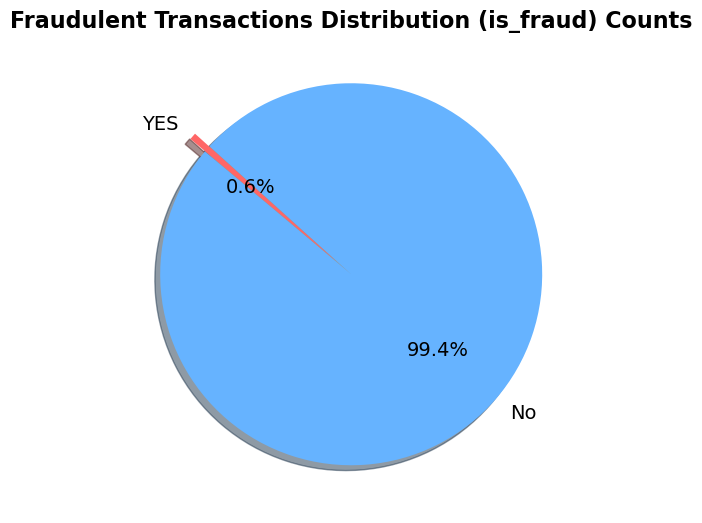

In [57]:
import matplotlib.pyplot as plt

# Calculate the counts of 'is_fraud' values in the train dataset
exit_counts = df_train["is_fraud"].value_counts()

# Define the labels and colors for the pie chart
labels = ["No", "YES"]
colors = ['#66b3ff', '#ff6666']

# Create a figure for the pie chart
plt.figure(figsize=(10, 7))

# Create subplot for the pie chart
plt.subplot(1, 2, 1)

# Plot the pie chart with enhancements
plt.pie(
    exit_counts,
    labels=labels,
    colors=colors,
    autopct="%0.1f%%",
    startangle=140,
    shadow=True,
    explode=(0, 0.1),
    textprops={'fontsize': 14}
)

# Set title for the pie chart
plt.title("Fraudulent Transactions Distribution (is_fraud) Counts", fontsize=16, fontweight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [58]:
# Calculate the correlation matrix for the train dataset
df_train.corr()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
merchant,1.000000,0.032302,-0.002633,0.000915,-0.002266,-0.000697,0.001911,0.001360,-0.000999,-0.002263,-0.000673,-0.000536
category,0.032302,1.000000,0.030867,0.028259,-0.008660,-0.000767,0.009386,0.003490,0.000182,-0.008519,-0.000736,0.020205
amt,-0.002633,0.030867,1.000000,-0.001034,-0.001926,-0.000187,0.005818,-0.000628,-0.000293,-0.001873,-0.000151,0.219404
gender,0.000915,0.028259,-0.001034,1.000000,-0.042935,-0.050404,0.028649,0.079908,0.000960,-0.042645,-0.050350,-0.007642
lat,-0.002266,-0.008660,-0.001926,-0.042935,1.000000,-0.015533,-0.155730,-0.027593,0.000632,0.993592,-0.015509,0.001894
long,-0.000697,-0.000767,-0.000187,-0.050404,-0.015533,1.000000,-0.052715,-0.002729,-0.000642,-0.015452,0.999120,0.001721
city_pop,0.001911,0.009386,0.005818,0.028649,-0.155730,-0.052715,1.000000,-0.054945,-0.001714,-0.154781,-0.052687,0.002136
job,0.001360,0.003490,-0.000628,0.079908,-0.027593,-0.002729,-0.054945,1.000000,0.000032,-0.027412,-0.002727,-0.000093
unix_time,-0.000999,0.000182,-0.000293,0.000960,0.000632,-0.000642,-0.001714,0.000032,1.000000,0.000561,-0.000635,-0.005078
merch_lat,-0.002263,-0.008519,-0.001873,-0.042645,0.993592,-0.015452,-0.154781,-0.027412,0.000561,1.000000,-0.015431,0.001741


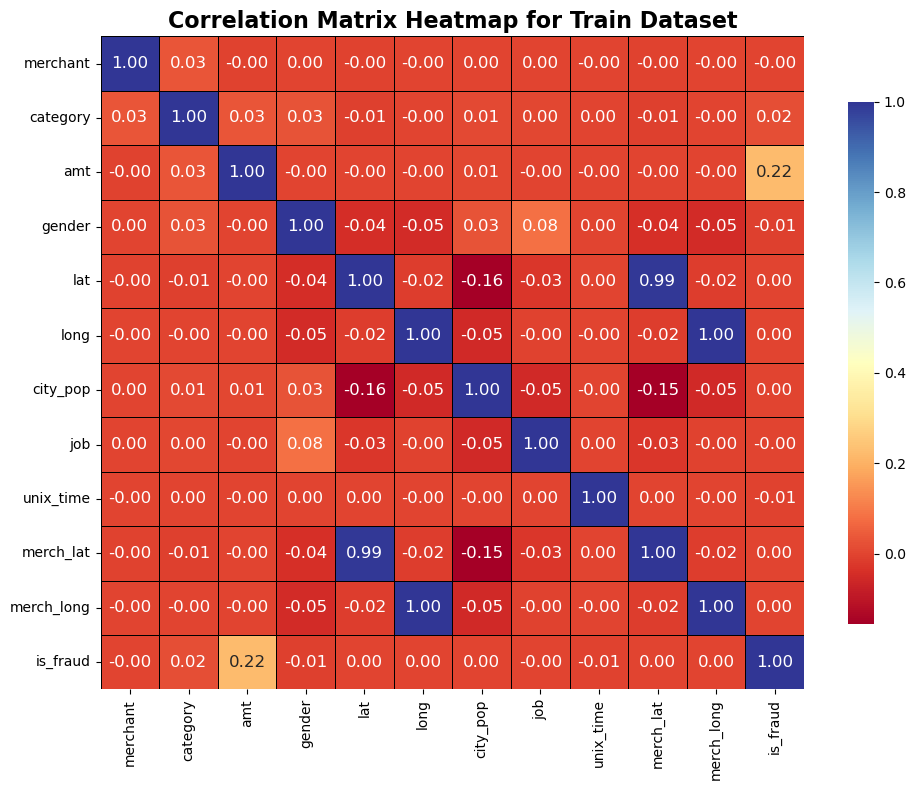

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap to visualize the correlation matrix for the train dataset
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_train.corr(),
    annot=True,
    cmap='RdYlBu',
    fmt=".2f",
    linewidths=0.5,
    linecolor='black',
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 12}
)

# Set title for the heatmap
plt.title('Correlation Matrix Heatmap for Train Dataset', fontsize=16, fontweight='bold')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# 🚀 Model Training and Evaluation

In [61]:
# Separate features (X) and target variable (y)
x = df_train.drop(columns=["is_fraud"], inplace=False)
y = df_train["is_fraud"]

In [62]:
# Split the dataset into training and testing sets
x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
# Initialize the model#
model = LogisticRegression()

In [65]:
# Fit the model on the training data
model.fit(x_df_train, y_df_train)

# Make predictions on the testing data
y_pred = model.predict(x_df_test)

# Evaluate the model
accuracy = accuracy_score(y_df_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9941388551487458


In [66]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(x_df_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_df_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(y_df_test, y_pred)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[257815      0]
 [  1520      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335





## 🌟 Conclusion

In this exciting journey, we embarked on a mission to combat transaction fraud using cutting-edge machine learning techniques. Through meticulous data wrangling, exploratory analysis, and model training, we've unearthed valuable insights and built a robust fraud detection system.

🛠️ **Data Preparation:** We meticulously curated and prepared the datasets, ensuring they were primed for analysis. By cleaning and encoding features, we laid the foundation for our fraud detection model.

🔍 **Exploratory Data Analysis (EDA):** Delving deep into the data, we uncovered hidden patterns and correlations. Our visualizations illuminated the distribution of fraudulent transactions, providing crucial insights for model development.

🤖 **Model Training:** Leveraging the power of logistic regression, we trained a sophisticated model capable of discerning fraudulent activities from legitimate transactions. Through rigorous training and evaluation, our model emerged as a formidable guardian of financial integrity.

🎯 **Achievements:** Our efforts culminated in a remarkable accuracy score, underscoring the effectiveness of our fraud detection system. With each fraudulent transaction identified, we're one step closer to fortifying the digital ecosystem against financial malfeasance.

🚀 **Future Endeavors:** As we celebrate our success, we look to the horizon with optimism. Future iterations of our model hold the promise of even greater accuracy and efficiency. By embracing innovation and continuous improvement, we're poised to redefine the landscape of transaction security.

In conclusion, our journey exemplifies the transformative potential of data-driven solutions in combating fraud. Together, we've paved the way for a safer, more secure digital future.

